This notebook focusses on data preprocessing. We are currently using the BSDS-300 dataset. This dataset contains images of arbitrary shapes. We first divide the images into smaller chunks of uniform shapes so that we can train the network over batches of these chunks.

THe BSDS-300 dataset contains 200 images (training set) with dimensions 481x321 or 321x481.

We also generate blurred and low resolution images.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/BDS500/Notebooks

Mounted at /content/drive
/content/drive/MyDrive/BDS500/Notebooks


In [2]:
import os
from utils.preprocessing import *

# Generate BSDS 300 chunks
BASE_DIR = os.path.join('/content', 'drive', 'MyDrive', 'BDS500')
BSDS_DIR = os.path.join(BASE_DIR, 'BSDS300-images', 'BSDS300', 'images', 'train')
bsds_chunks = get_bsds_300_chunks(BSDS_DIR, chunk_size=(32, 32), num_chunks=100)

print('bsds_chunks.shape: {}'.format(bsds_chunks.shape))

bsds_chunks.shape: (100, 32, 32, 3)


/content/drive/MyDrive/BDS500/Notebooks/utils/plotting.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, image_idx + 1)


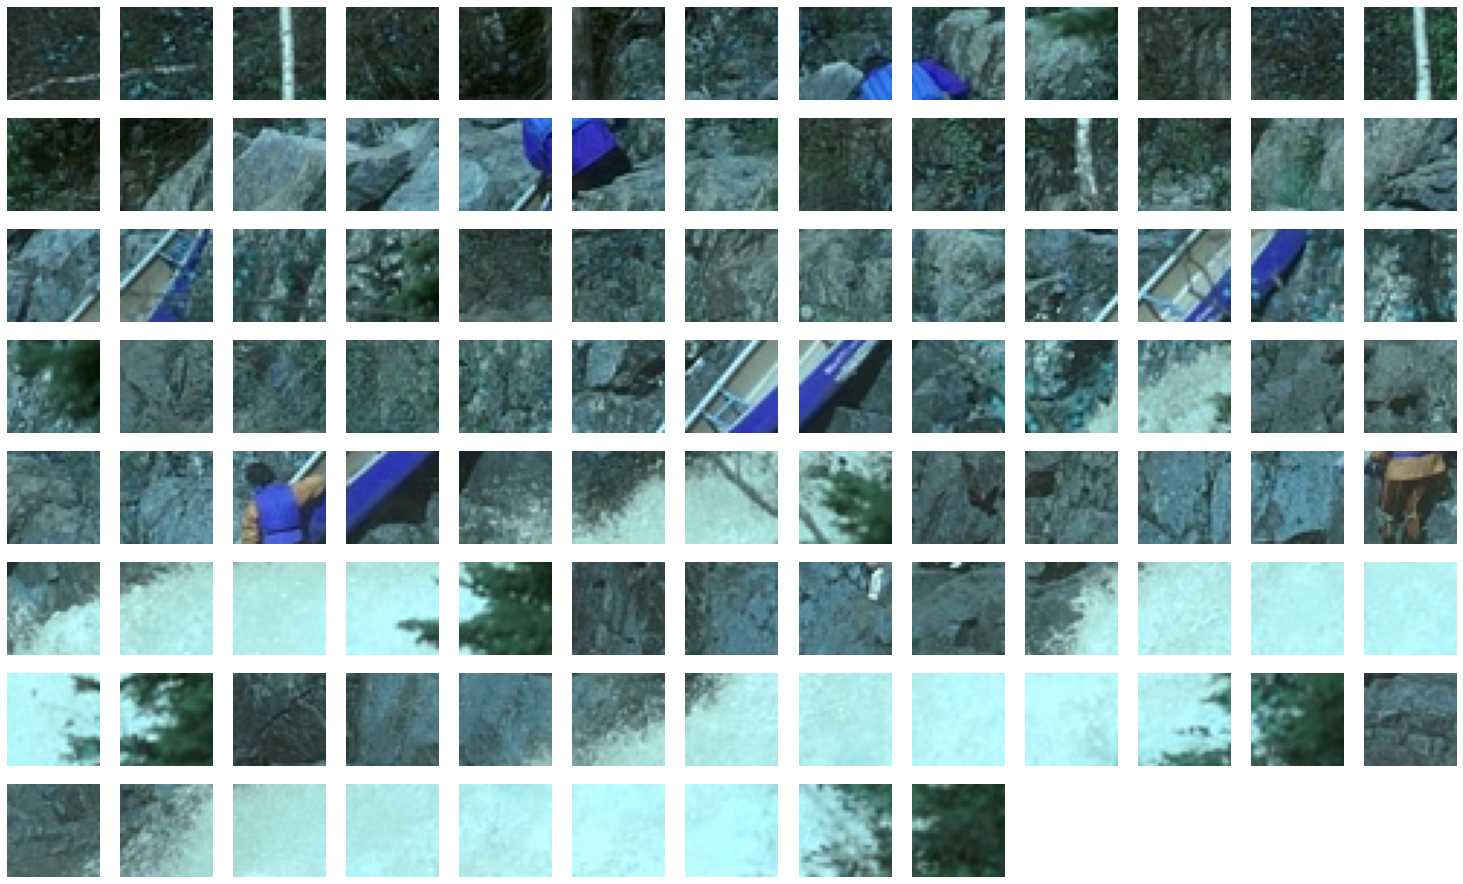

In [ ]:
from utils.plotting import *

# Plot the image chunks
plot_images(bsds_chunks)

blurred_chunks.shape: (100, 32, 32, 3)


/content/drive/MyDrive/BDS500/Notebooks/utils/plotting.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, image_idx + 1)


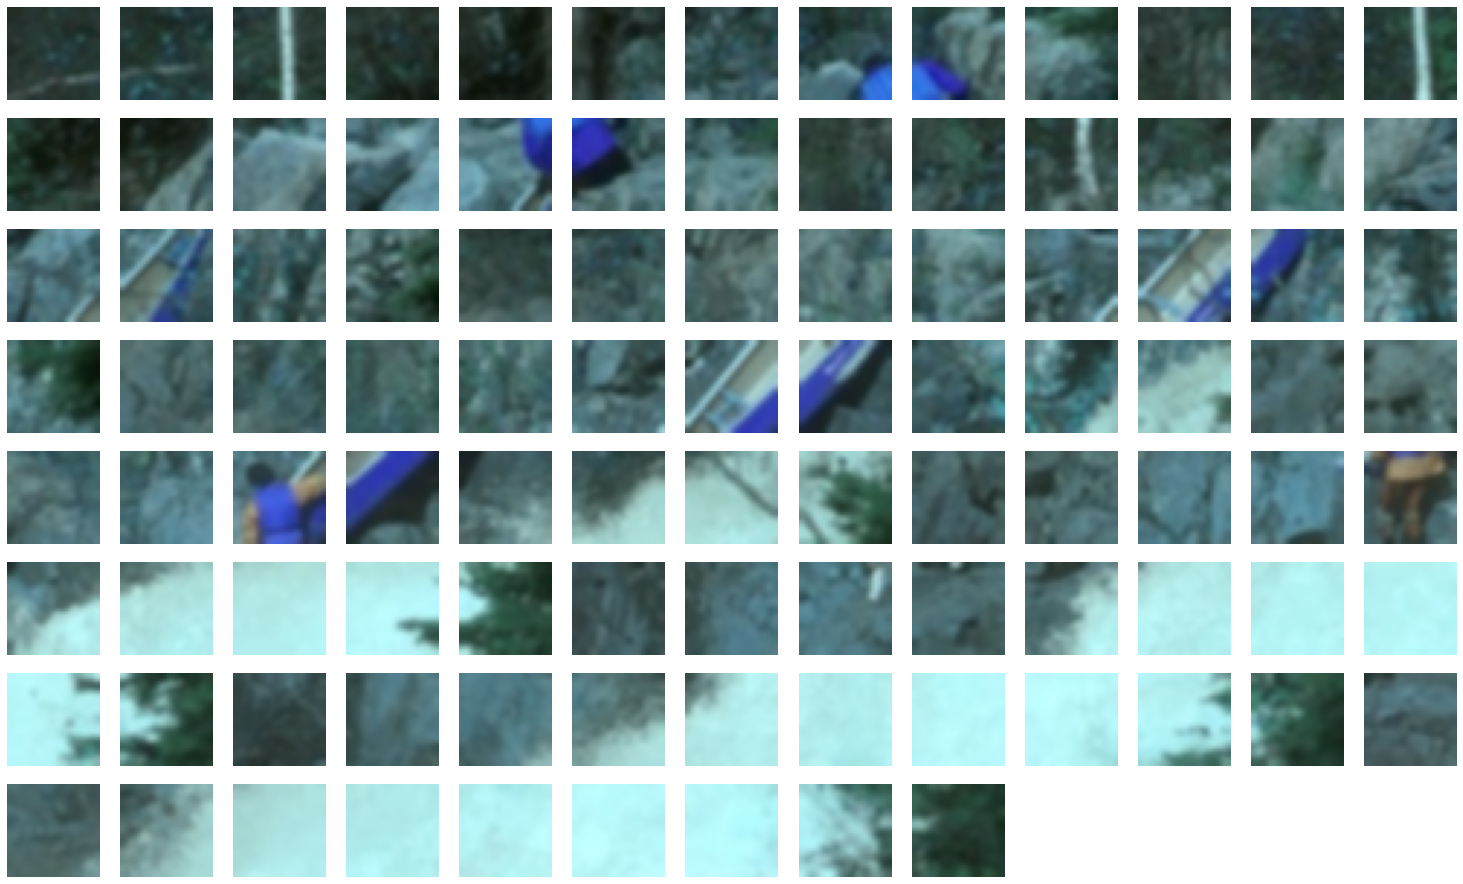

In [ ]:
# Generate blurred images
blurred_chunks = blur_images(bsds_chunks, kernel_size=(5, 5))

print('blurred_chunks.shape: {}'.format(blurred_chunks.shape))

# Plot the blurred image chunks
plot_images(blurred_chunks)

low_res_chunks.shape: (100, 16, 16, 3)


/content/drive/MyDrive/BDS500/Notebooks/utils/plotting.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, image_idx + 1)


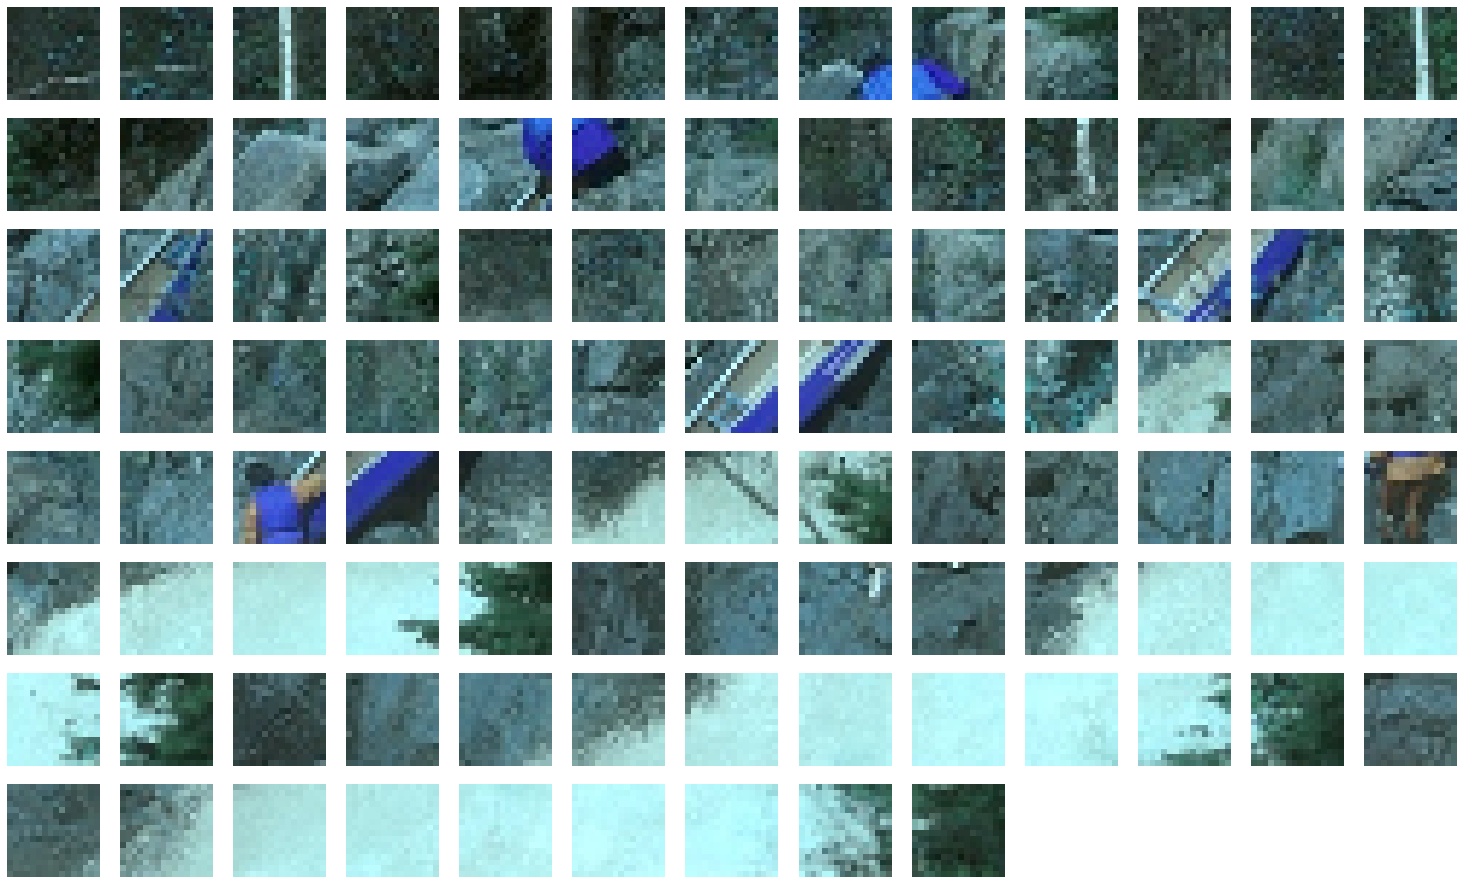

In [ ]:
# Generate low-res images
low_res_chunks = resize_images(bsds_chunks, scale=0.5)

print('low_res_chunks.shape: {}'.format(low_res_chunks.shape))

# Plot the low-res image chunks
plot_images(low_res_chunks)

interpolated_chunks.shape: (100, 32, 32, 3)


/content/drive/MyDrive/BDS500/Notebooks/utils/plotting.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, image_idx + 1)


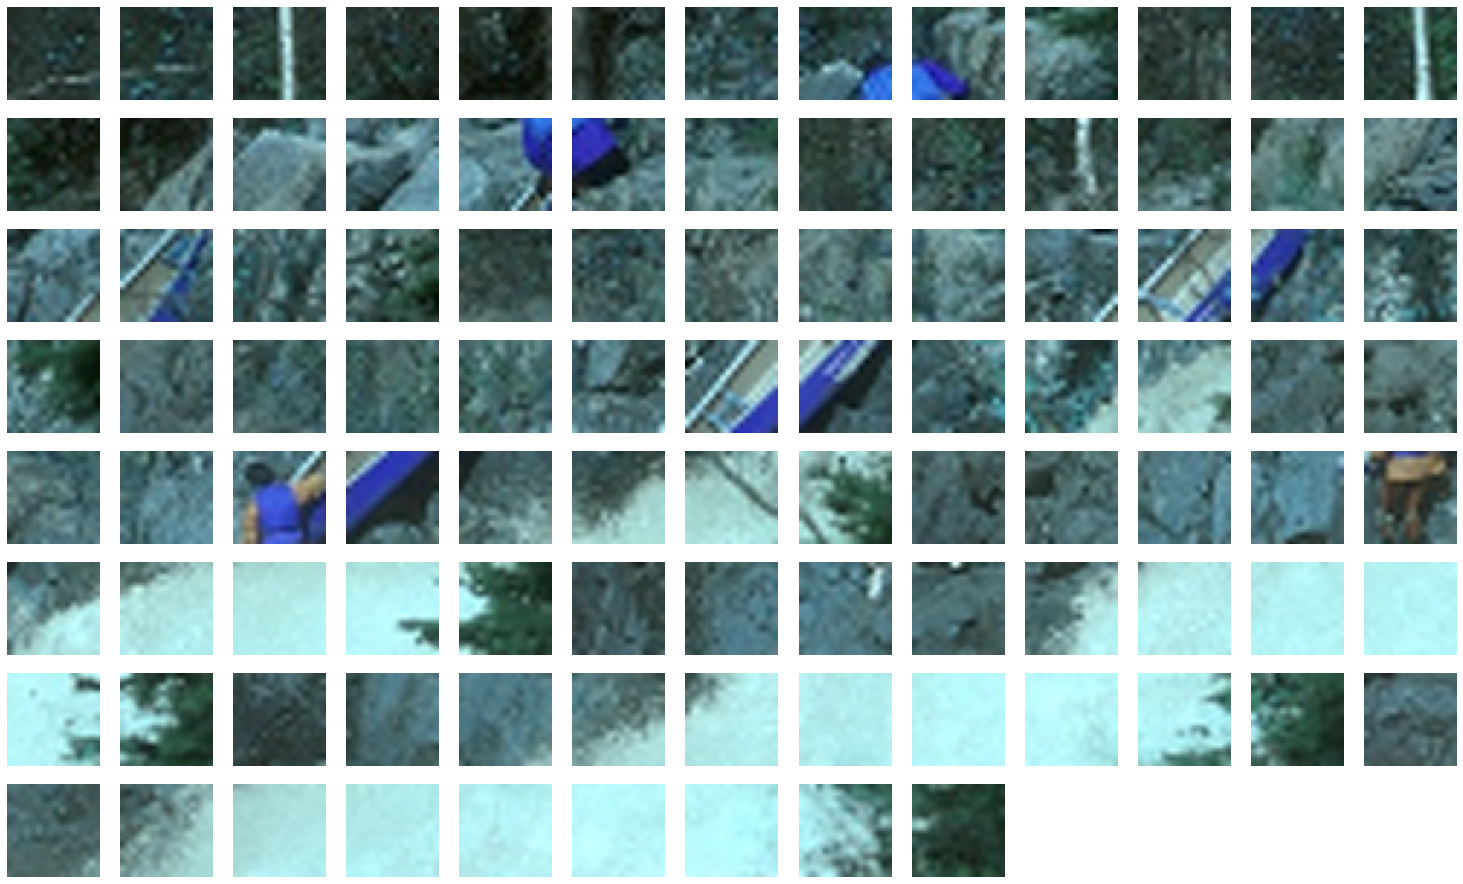

In [ ]:
# Generate interpolated images with cubic interpolation from low-res images
interpolated_chunks = resize_images(low_res_chunks, scale=2.0, mode='cubic')

print('interpolated_chunks.shape: {}'.format(interpolated_chunks.shape))

# Plot the interpolated image chunks
plot_images(interpolated_chunks)

In [ ]:
from utils.metrics import *

# Display the psnr when we use cubic interpolation to optain high-res images
print('PSNR: {}'.format(psnr(bsds_chunks, interpolated_chunks)))

PSNR: 31.371487740393995


In [ ]:
# Generate all possible chunks from the BSDS-300 dataset
bsds_300_chunks = get_bsds_300_chunks(BSDS_DIR, chunk_size=(32, 32))

print('bsds_300_chunks.shape: {}'.format(bsds_300_chunks.shape))

# Save the chunks to a .npy file
# These chunks can be loaded later using np.load
PROC_IMAGE_DIR = os.path.join(BASE_DIR, 'Processed Images')
PROC_CHUNKS_FILE = os.path.join(PROC_IMAGE_DIR, 'bsds_300_chunks.npy')

np.save(PROC_CHUNKS_FILE, bsds_300_chunks)

bsds_300_chunks.shape: (30000, 32, 32, 3)


In [ ]:
# Generate blurred chunks
blurred_bsds_300_chunks = blur_images(bsds_300_chunks, kernel_size=(9, 9))

print('blurred_bsds_300_chunks.shape: {}'.format(blurred_bsds_300_chunks.shape))

# Save the blurred chunks to a .npy file
BLUR_CHUNKS_FILE = os.path.join(PROC_IMAGE_DIR, 'blurred_bsds_300_chunks.npy')

np.save(BLUR_CHUNKS_FILE, blurred_bsds_300_chunks)

blurred_bsds_300_chunks.shape: (30000, 32, 32, 3)


In [ ]:
# Generate low-res chunks
low_res_bsds_300_chunks = resize_images(bsds_300_chunks, scale=0.5)

print('low_res_bsds_300_chunks.shape: {}'.format(low_res_bsds_300_chunks.shape))

# Save the low-res chunks to a .npy file
LR_CHUNKS_FILE = os.path.join(PROC_IMAGE_DIR, 'low_res_bsds_300_chunks.npy')

np.save(LR_CHUNKS_FILE, low_res_bsds_300_chunks)

low_res_bsds_300_chunks.shape: (30000, 16, 16, 3)


In [ ]:
# Generate blurred low-res chunks
blurred_low_res_bsds_300_chunks = resize_images(blurred_bsds_300_chunks, scale=0.5)

print('blurred_low_res_bsds_300_chunks.shape: {}'.format(blurred_low_res_bsds_300_chunks.shape))

# Save the blurred low-res chunks to a .npy file
BLUR_LR_CHUNKS_FILE = os.path.join(PROC_IMAGE_DIR, 'blurred_low_res_bsds_300_chunks.npy')

np.save(BLUR_LR_CHUNKS_FILE, blurred_low_res_bsds_300_chunks)

blurred_low_res_bsds_300_chunks.shape: (30000, 16, 16, 3)


bsds_300_chunks.shape: (30000, 32, 32, 3)
blurred_bsds_300_chunks.shape: (30000, 32, 32, 3)
low_res_bsds_300_chunks.shape: (30000, 16, 16, 3)
blurred_low_res_bsds_300_chunks.shape: (30000, 16, 16, 3)


/content/drive/MyDrive/BDS500/Notebooks/utils/plotting.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, image_idx + 1)


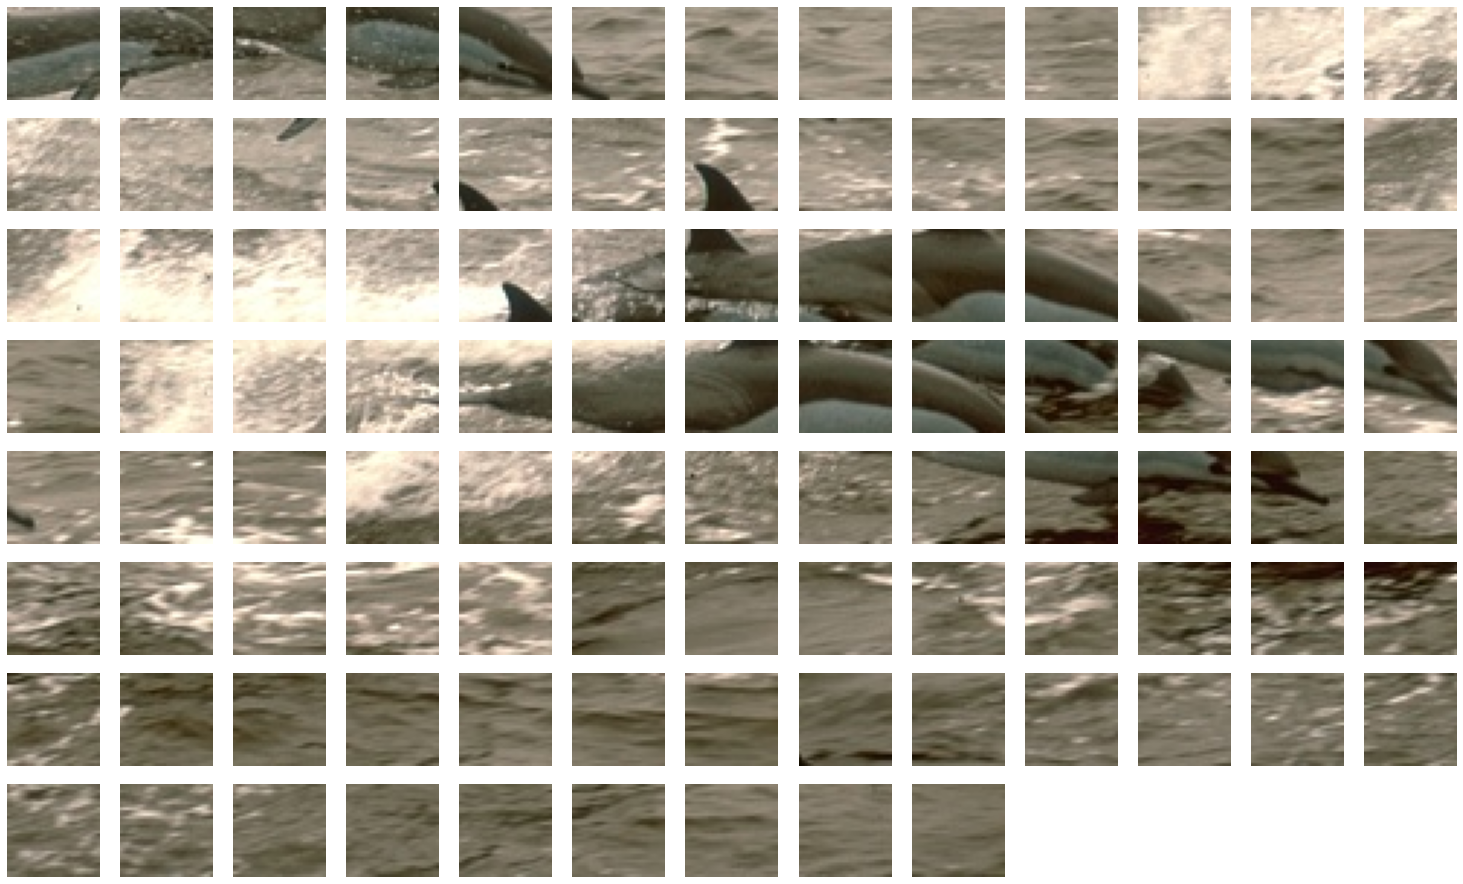

In [ ]:
# Load the saved data and plot some images
bsds_300_chunks                 = np.load(PROC_CHUNKS_FILE)
blurred_bsds_300_chunks         = np.load(BLUR_CHUNKS_FILE)
low_res_bsds_300_chunks         = np.load(LR_CHUNKS_FILE)
blurred_low_res_bsds_300_chunks = np.load(BLUR_LR_CHUNKS_FILE)

print('bsds_300_chunks.shape: {}'.format(bsds_300_chunks.shape))
print('blurred_bsds_300_chunks.shape: {}'.format(blurred_bsds_300_chunks.shape))
print('low_res_bsds_300_chunks.shape: {}'.format(low_res_bsds_300_chunks.shape))
print('blurred_low_res_bsds_300_chunks.shape: {}'.format(blurred_low_res_bsds_300_chunks.shape))

to_display = 100
plot_images(bsds_300_chunks[-to_display:])

/content/drive/MyDrive/BDS500/Notebooks/utils/plotting.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, image_idx + 1)


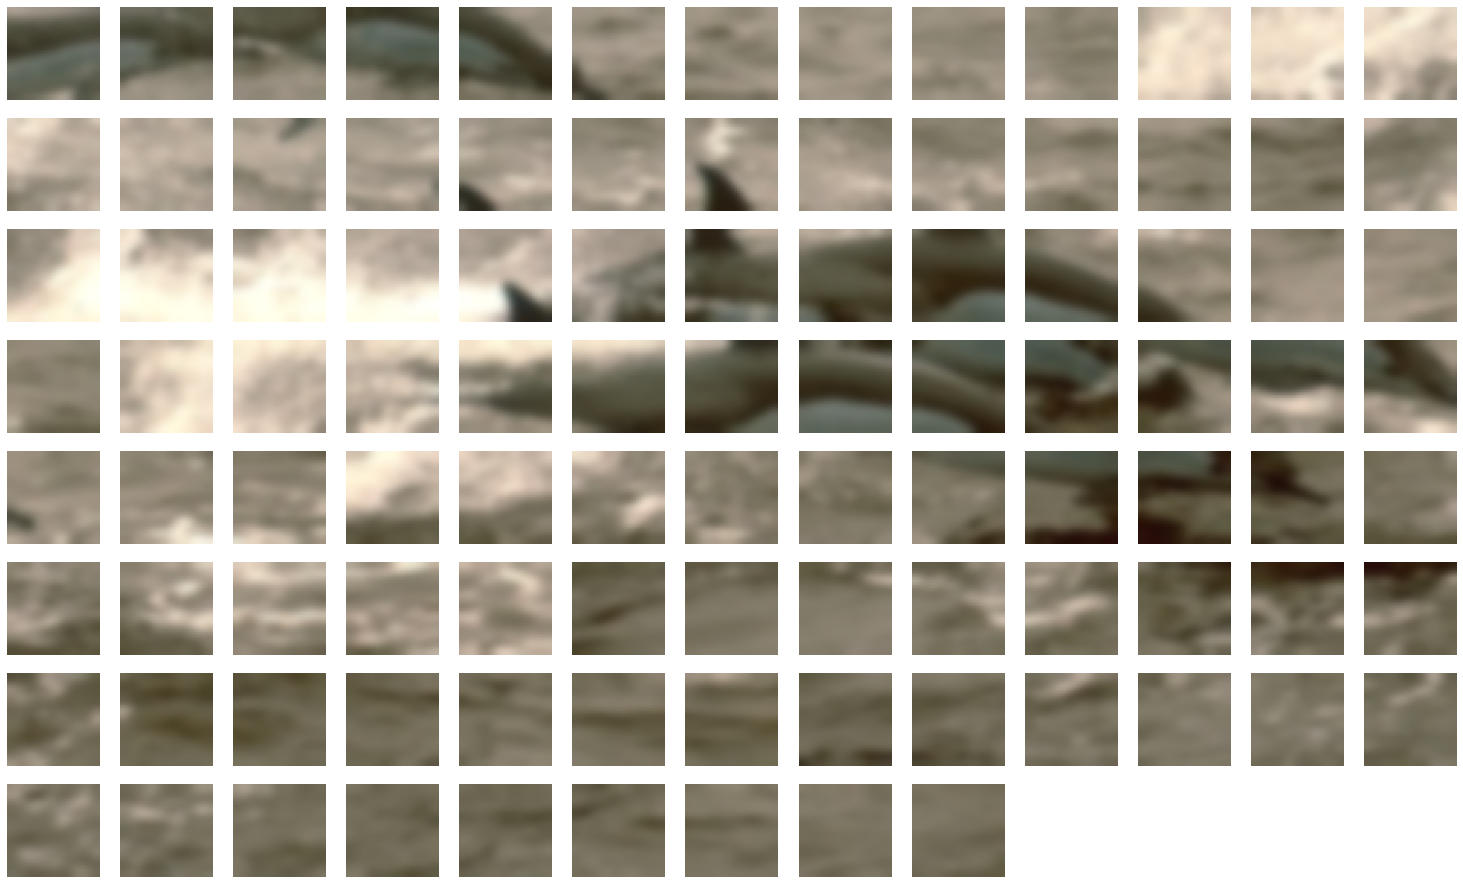

In [ ]:
plot_images(blurred_bsds_300_chunks[-to_display:])

/content/drive/MyDrive/BDS500/Notebooks/utils/plotting.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, image_idx + 1)


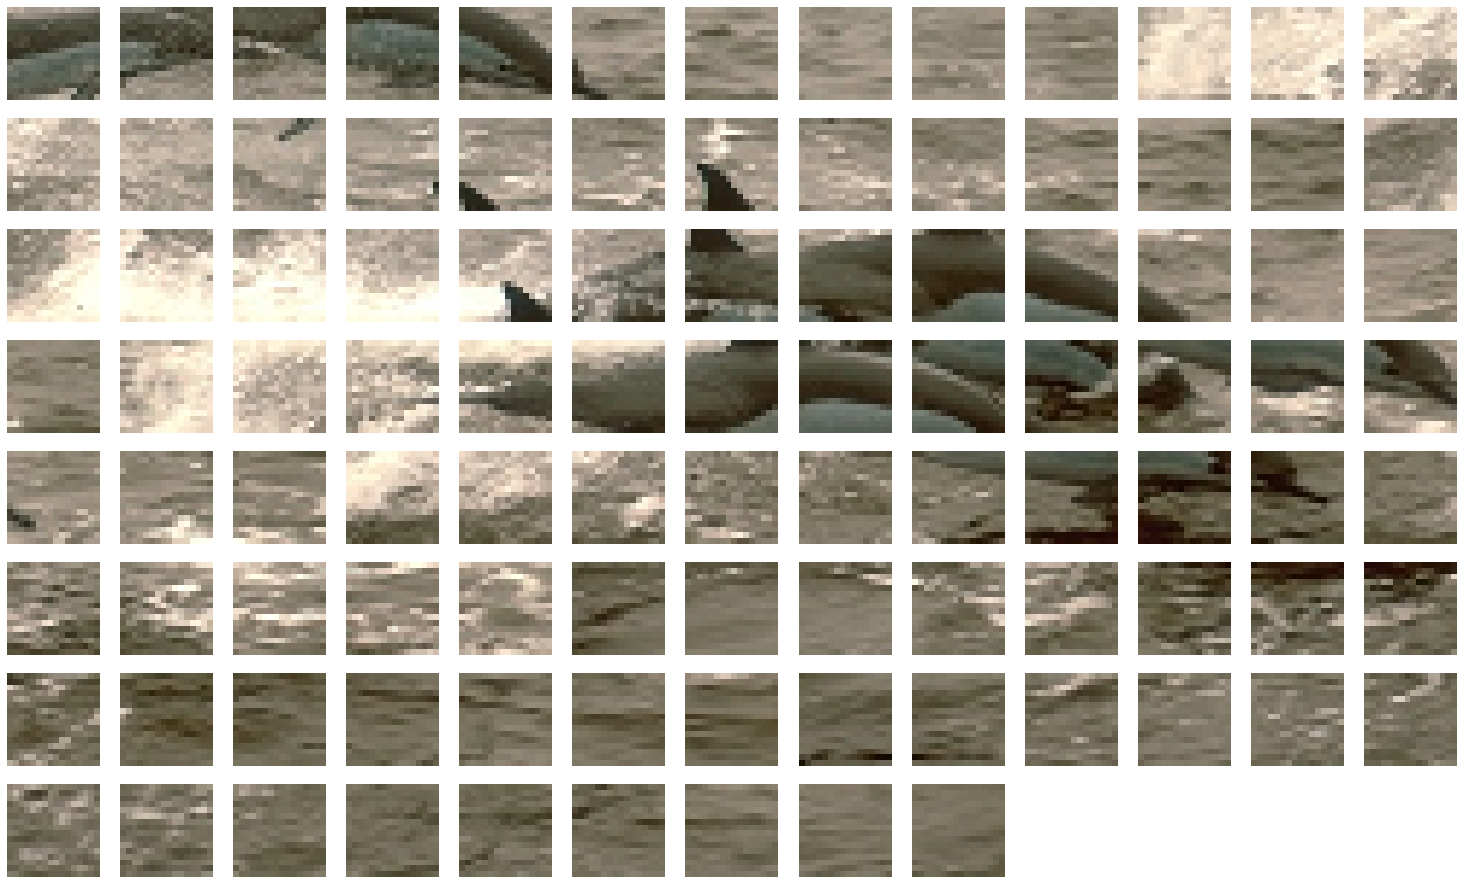

In [ ]:
plot_images(low_res_bsds_300_chunks[-to_display:])

/content/drive/MyDrive/BDS500/Notebooks/utils/plotting.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, image_idx + 1)


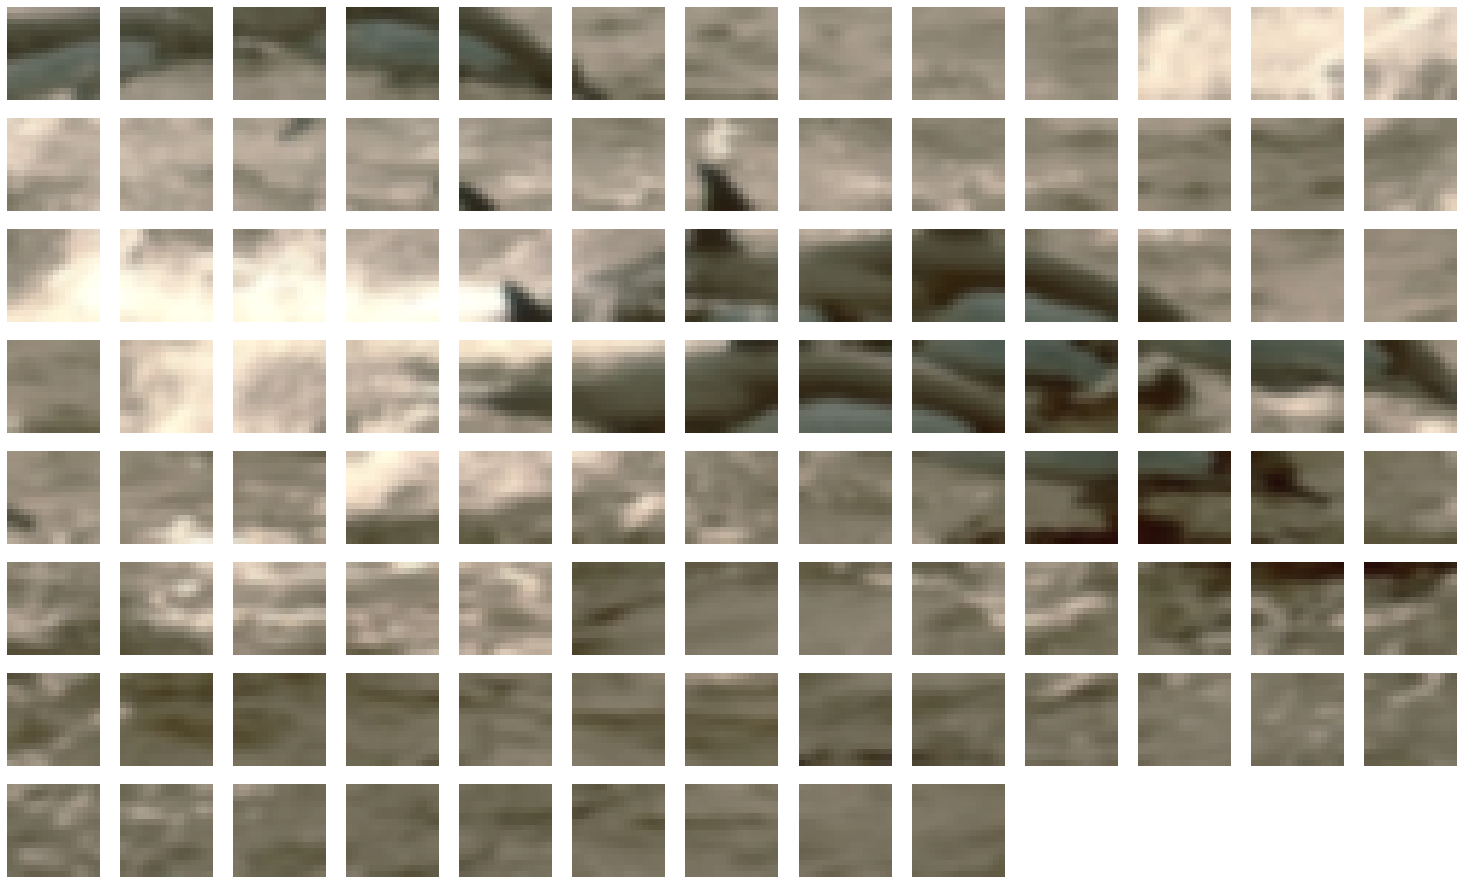

In [ ]:
plot_images(blurred_low_res_bsds_300_chunks[-to_display:])

In [ ]:
# Convert IFAN images to .npy file
IFAN_IMAGE_DIR = os.path.join(PROC_IMAGE_DIR, 'IFAN Images')

# Get IFAN images
ifan_chunks = []
for i, file_name in enumerate(os.listdir(IFAN_IMAGE_DIR)):
    if i % 1000 == 0:
        print('Saving IFAN image chunk no. {}'.format(i))
    ifan_chunks.append(cv2.imread(os.path.join(IFAN_IMAGE_DIR, file_name), cv2.IMREAD_COLOR))
    
ifan_chunks = np.array(ifan_chunks) 

print('ifan_chunks.shape: {}'.format(ifan_chunks.shape))

# Save the chunks to a .npy file
# These chunks can be loaded later using np.load
IFAN_CHUNKS_FILE = os.path.join(PROC_IMAGE_DIR, 'ifan_chunks.npy')

np.save(IFAN_CHUNKS_FILE, ifan_chunks)

Saving IFAN image chunk no. 0
Saving IFAN image chunk no. 1000
Saving IFAN image chunk no. 2000
Saving IFAN image chunk no. 3000
Saving IFAN image chunk no. 4000
Saving IFAN image chunk no. 5000
Saving IFAN image chunk no. 6000
Saving IFAN image chunk no. 7000
Saving IFAN image chunk no. 8000
Saving IFAN image chunk no. 9000
Saving IFAN image chunk no. 10000
Saving IFAN image chunk no. 11000
Saving IFAN image chunk no. 12000
Saving IFAN image chunk no. 13000
Saving IFAN image chunk no. 14000
Saving IFAN image chunk no. 15000
Saving IFAN image chunk no. 16000
Saving IFAN image chunk no. 17000
Saving IFAN image chunk no. 18000
Saving IFAN image chunk no. 19000
Saving IFAN image chunk no. 20000
Saving IFAN image chunk no. 21000
Saving IFAN image chunk no. 22000
Saving IFAN image chunk no. 23000
Saving IFAN image chunk no. 24000
Saving IFAN image chunk no. 25000
Saving IFAN image chunk no. 26000
Saving IFAN image chunk no. 27000
Saving IFAN image chunk no. 28000
Saving IFAN image chunk no.

ifan_chunks.shape: (30000, 16, 16, 3)


/content/drive/MyDrive/BDS500/Notebooks/utils/plotting.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, image_idx + 1)


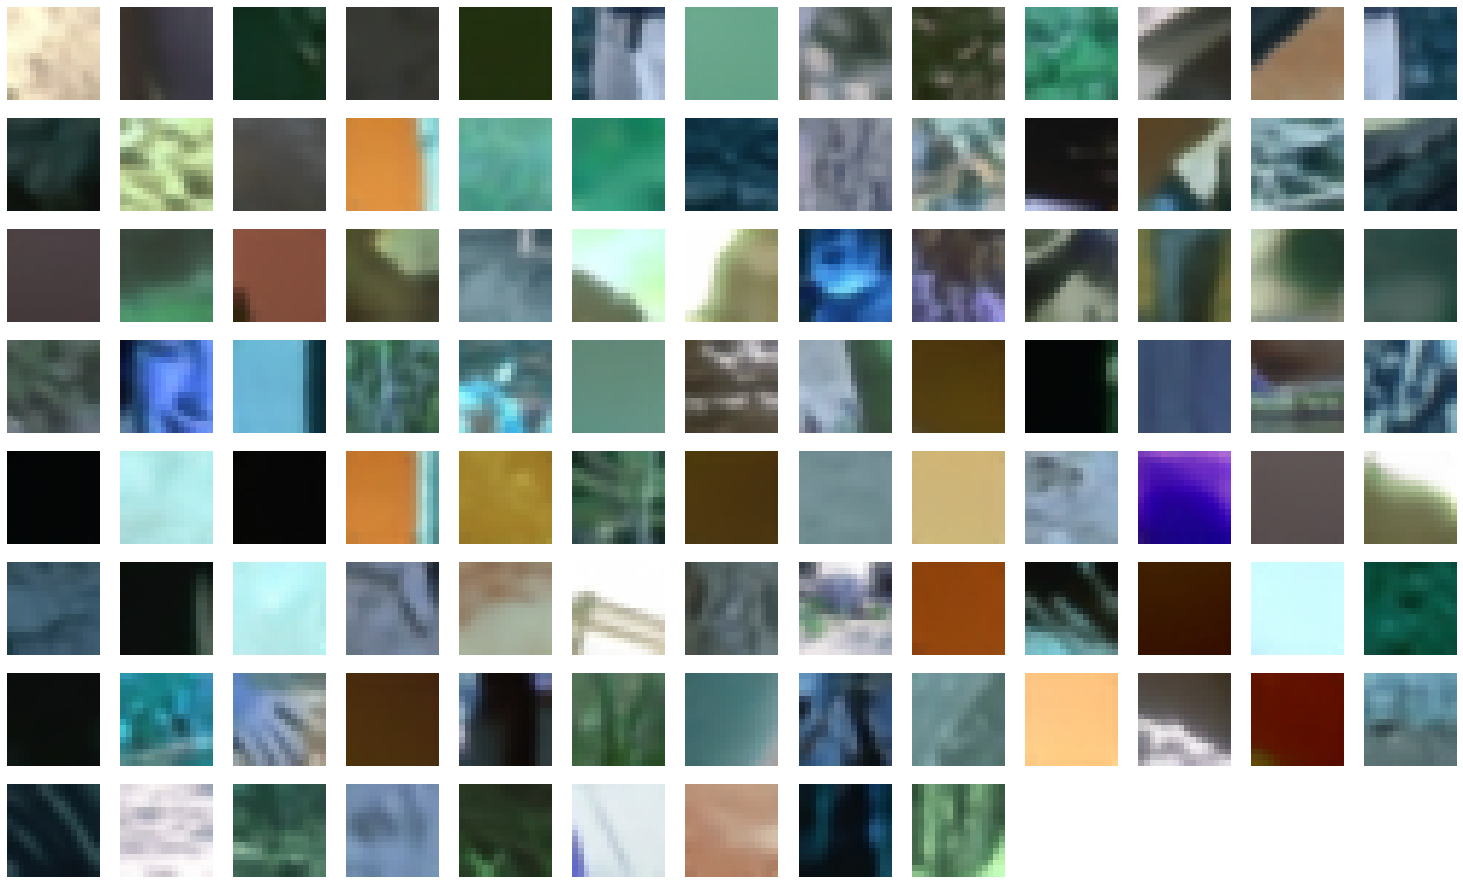

In [ ]:
# Display IFAN images
ifan_chunks = np.load(IFAN_CHUNKS_FILE)
print('ifan_chunks.shape: {}'.format(ifan_chunks.shape))

to_display = 100
plot_images(ifan_chunks[-to_display:])

In [ ]:
# Generate DPDD IFAN output images
DPDD_IFAN_DIR = os.path.join('/content', 'drive', 'MyDrive', '2021_11_06_1837.zip (Unzipped Files)', '2021_11_06_1837', '2021_11_06_1837', 'output', 'png')

dpdd_ifan_output_images = get_bsds_300_test_images(DPDD_IFAN_DIR)

print('len(dpdd_ifan_output_images)', len(dpdd_ifan_output_images))